# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [4]:
# %pip install --upgrade plotly

### Import Statements

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import country_converter as coco

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [10]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [13]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [14]:
df_data.shape

(962, 16)

In [15]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [16]:
df_data.year.min()

1901

In [17]:
df_data.year.max()

2020

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [21]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [23]:
df_data.isna().values.any()

True

In [24]:
df_data.isna().sample(10)

year  category  prize  motivation  prize_share  laureate_type  \
232  False     False  False       False        False          False   
266  False     False  False       False        False          False   
215  False     False  False        True        False          False   
591  False     False  False       False        False          False   
28   False     False  False       False        False          False   
411  False     False  False       False        False          False   
431  False     False  False       False        False          False   
388  False     False  False       False        False          False   
352  False     False  False       False        False          False   
441  False     False  False       False        False          False   

     full_name  birth_date  birth_city  birth_country  birth_country_current  \
232      False       False       False          False                  False   
266      False       False       False          False                  False   
215      False        True        True           True                   True   
591      False       False       False          False                  False   
28       False       False       False          False                  False   
411      False       False       False          False                  False   
431      False       False       False          False                  False   
388      False       False       False          False                  False   
352      False       False       False          False                  False   
441      False       False       False          False                  False   

       sex  organization_name  organization_city  organization_country    ISO  
232  False              False              False                 False  False  
266  False              False              False                 False  False  
215   True               True               True                  True   True  
591  False              False              False                 False  False  
28   False              False              False                 False  False  
411  False              False              False                 False  False  
431  False              False              False                 False  False  
388  False              False              False                 False  False  
352  False              False              False                 False  False  
441  False               True               True                  True  False

In [221]:
columns = df_data.columns
for cols in columns:
    print(df_data[f'{cols}'].isna().value_counts())

year
False    962
Name: count, dtype: int64
category
False    962
Name: count, dtype: int64
prize
False    962
Name: count, dtype: int64
motivation
False    874
True      88
Name: count, dtype: int64
prize_share
False    962
Name: count, dtype: int64
laureate_type
False    962
Name: count, dtype: int64
full_name
False    962
Name: count, dtype: int64
birth_date
False    934
True      28
Name: count, dtype: int64
birth_city
False    931
True      31
Name: count, dtype: int64
birth_country
False    934
True      28
Name: count, dtype: int64
birth_country_current
False    934
True      28
Name: count, dtype: int64
sex
False    934
True      28
Name: count, dtype: int64
organization_name
False    707
True     255
Name: count, dtype: int64
organization_city
False    707
True     255
Name: count, dtype: int64
organization_country
False    708
True     254
Name: count, dtype: int64
ISO
False    934
True      28
Name: count, dtype: int64
share_pct
False    962
Name: count, dtype: int64
age
Fal

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [28]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
print(type(df_data['birth_date'][7]))
    

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Add a Column with the Prize Share as a Percentage

In [30]:
perc = 100
sep_nums = df_data.prize_share.astype(str).str.split('/', expand=True)
num1 = sep_nums[0].astype(int)
num2 = sep_nums[1].astype(int)
df_data['share_pct'] = num1/num2*perc


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [33]:
fig = px.pie(labels=df_data.sex.value_counts().index, values=df_data.sex.value_counts().values, names=df_data.sex.value_counts().index, title='Number of Female Prize Winners Against Male winners', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [35]:
df_data[df_data.sex == 'Female'].head()

year    category                               prize  \
18   1903     Physics     The Nobel Prize in Physics 1903   
29   1905       Peace          The Nobel Peace Prize 1905   
51   1909  Literature  The Nobel Prize in Literature 1909   
62   1911   Chemistry   The Nobel Prize in Chemistry 1911   
128  1926  Literature  The Nobel Prize in Literature 1926   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
29                                                 NaN         1/1   
51   "in appreciation of the lofty idealism, vivid ...         1/1   
62   "in recognition of her services to the advance...         1/1   
128  "for her idealistically inspired writings whic...         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
29     Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51     Individual                      Selma Ottilia Lovisa Lagerlöf   
62     Individual                        Marie Curie, née Sklodowska   
128    Individual                                     Grazia Deledda   

    birth_date       birth_city                     birth_country  \
18  1867-11-07           Warsaw           Russian Empire (Poland)   
29  1843-06-09           Prague  Austrian Empire (Czech Republic)   
51  1858-11-20         Mårbacka                            Sweden   
62  1867-11-07           Warsaw           Russian Empire (Poland)   
128 1871-09-27  Nuoro, Sardinia                             Italy   

    birth_country_current     sex    organization_name organization_city  \
18                 Poland  Female                  NaN               NaN   
29         Czech Republic  Female                  NaN               NaN   
51                 Sweden  Female                  NaN               NaN   
62                 Poland  Female  Sorbonne University             Paris   
128                 Italy  Female                  NaN               NaN   

    organization_country  ISO  share_pct  
18                   NaN  POL      25.00  
29                   NaN  CZE     100.00  
51                   NaN  SWE     100.00  
62                France  POL     100.00  
128                  NaN  ITA     100.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [37]:
df_data.full_name.value_counts()

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
                                                                                    ..
Melvin Calvin                                                                        1
Ivo Andric                                                                           1
Georg von Békésy                                                                     1
Dag Hjalmar Agne Carl Hammarskjöld                                                   1
Roger Penrose                                                                        1
Name: count, Length: 955, dtype: 

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [39]:
df_data.category.nunique()

6

In [40]:
category = df_data.category.value_counts()
fig = px.bar(x=category.index, y=category.values, color=category.values, color_continuous_scale='aggrnyl')
fig.update(layout_coloraxis_showscale= False)
fig.update_layout(xaxis_title='Categories', yaxis_title='Amount of Rewards')
fig.show()

In [41]:
category.index

Index(['Medicine', 'Physics', 'Chemistry', 'Peace', 'Literature', 'Economics'], dtype='object', name='category')

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [43]:
df_data[df_data.category == 'Economics'].sort_values('year',ascending=True).head()

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
411  1971  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
419  1972  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   
411  "for his empirically founded interpretation of...         1/1   
419  "for their pioneering contributions to general...         1/2   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   
411    Individual      Simon Kuznets 1901-04-30      Pinsk   
419    Individual      John R. Hicks 1904-04-08    Warwick   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   
411  Russian Empire (Belarus)                   Belarus  Male   
419            United Kingdom            United Kingdom  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   
411                           Harvard University     Cambridge, MA   
419                         University of Oxford            Oxford   

         organization_country  ISO  share_pct  
393               Netherlands  NLD      50.00  
394                    Norway  NOR      50.00  
402  United States of America  USA     100.00  
411  United States of America  BLR     100.00  
419            United Kingdom  GBR      50.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [45]:
m_f_bar = df_data.groupby(['sex', 'category'], as_index=False).agg({'prize': pd.Series.count})

In [46]:
fig = px.bar(x=m_f_bar.category.values, y=m_f_bar.prize.values, color=m_f_bar.sex.values)
fig.update_layout(xaxis_title = 'Categories', yaxis_title='Prize count')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [48]:
df_data.year.max()

2020

In [49]:
prize_over_time = df_data.groupby(['year']).agg({'prize': pd.Series.count})
rang = np.arange(1900, 2025, 5)
yrang = np.arange(0, 16, 2)

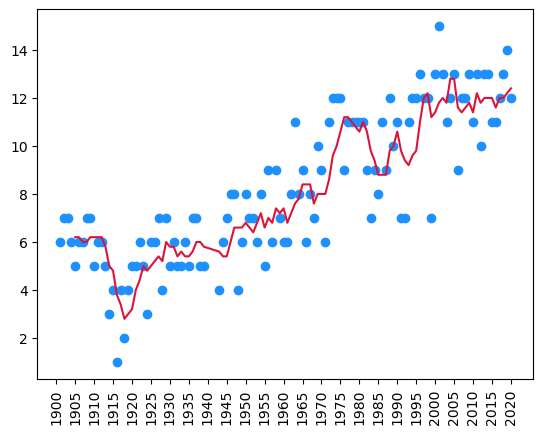

In [50]:
plt.xticks(ticks=rang, rotation='vertical')

scatter_plot = plt.scatter(x=prize_over_time.index, y=prize_over_time.prize, c='dodgerblue')
rol_mean = prize_over_time.rolling(window=5).mean()
plot = plt.plot(prize_over_time.index, rol_mean.values, c='crimson')

##### Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [52]:
rolling_ave = df_data.groupby(['year']).agg({'share_pct': pd.Series.mean})
rolling_ave = rolling_ave.rolling(window=5).mean()


In [53]:
prize_over_time = df_data.groupby(['year']).agg({'prize': pd.Series.count})
rol_mean = prize_over_time.rolling(window=5).mean()
rang = np.arange(1900, 2025, 5)
yrang = np.arange(0, 16, 2)

In [54]:
plt.figure(figsize=(8, 4), dpi=2000)
plt.xticks(ticks=rang, rotation='vertical')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(x=prize_over_time.index, y=prize_over_time.prize, c='dodgerblue')
ax1.plot(prize_over_time.index, rol_mean.values, c='crimson')
ax2.plot(prize_over_time.index, rolling_ave.values)
ax2.invert_yaxis()



# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [57]:
top_20_count = df_data.groupby(['birth_country_current']).agg({'prize': pd.Series.count})

In [58]:
top_20_count = top_20_count.sort_values(by='prize', ascending=True)[-20:]
top_20_count

prize
birth_country_current          
Belgium                       9
Hungary                       9
India                         9
Australia                    10
Denmark                      12
Norway                       12
China                        12
Netherlands                  18
Austria                      18
Italy                        19
Switzerland                  19
Canada                       20
Russia                       26
Japan                        27
Poland                       27
Sweden                       29
France                       57
Germany                      84
United Kingdom              105
United States of America    281

In [59]:
color = 'thermal'
fig = px.bar(top_20_count, 'prize', top_20_count.index, orientation='h', color_continuous_scale = color, color='prize' )
fig.update_layout(height=600)
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [61]:
count_names = coco.convert(top_20_count.index, to='ISO3') 


In [62]:
fig = px.choropleth(locations=count_names, color=top_20_count.prize, color_continuous_scale='Matter')

In [63]:
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [65]:
top_20_count_2 = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
top_20_count_2.sort_values('prize', ascending=False, inplace=True)


In [66]:
top_20_count_2

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [67]:
#total_prize_per_count = top_20_count_2.groupby(['birth_country_current'], as_index=False).agg({'prize':pd.Series.count})
#total_prize_per_count.sort_values('prize', ascending=True)
merged_df = pd.merge(top_20_count_2, top_20_count, on='birth_country_current')
merged_df.columns=['birth_country_current', 'category', 'cat_prize', 'total_prize']

In [68]:
merged_df.sort_values('total_prize',inplace=True)

In [69]:
fig = px.bar(merged_df, x='cat_prize',y='birth_country_current', orientation='h', color='category')

In [70]:
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='Countries', height=600)


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [72]:
year_data = df_data.groupby(['year', 'birth_country_current'], as_index=False).count()
year_data = year_data.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_cumsum = year_data.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
prize_cumsum.reset_index(inplace=True) 

In [73]:
fig = px.scatter(year_data, x='year', y='prize', color='birth_country_current', color_continuous_scale='inferno')

In [74]:
fig.show()

In [75]:
line_graph = px.line(prize_cumsum, x='year', y='prize', color='birth_country_current')
line_graph.update_layout(height=600)

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [77]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

In [78]:
org_df = df_data.organization_name.value_counts()[:20]
org_df.sort_values(ascending=True, inplace=True)

In [79]:
org_df.head()

organization_name
Sorbonne University       7
Harvard Medical School    7
Institut Pasteur          7
London University         7
Bell Laboratories         8
Name: count, dtype: int64

In [80]:

fig = px.bar(org_df, x=org_df.values, y=org_df.index, orientation='h', color=org_df.values, color_continuous_scale='haline', hover_name=org_df.index)
fig.update_traces(xhoverformat='prizes',selector=dict(type='bar'))
fig.update_layout(xaxis_title='prizes', yaxis_title='organization name', height=700, width=1500)

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [82]:
org_cities = df_data.groupby(['organization_city'], as_index=False).agg({'prize': pd.Series.count})

In [83]:
org_cities = org_cities.sort_values('prize', ascending=True)[-20:]
org_cities

organization_city  prize
65          Göttingen      8
186            Zurich      8
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
23         Boston, MA      9
108            Moscow     10
157         Stockholm     10
126            Oxford     12
13             Berlin     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

In [84]:
fig = px.bar(org_cities, x='prize', y='organization_city', orientation='h', color='prize')
fig.update_layout(yaxis_title='Organization Name', xaxis_title='Prize', height=700, width=1500, coloraxis_showscale=False)
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [86]:
org_city = df_data.birth_city.value_counts()

In [87]:
org_city.sort_values(ascending=True, inplace=True)

In [88]:
fig = px.bar(org_city, x=org_city.values[-20:], y=org_city.index[-20:], color=org_city.values[-20:], color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='Number of Laureates', yaxis_title='Cities', height=700, width=1500, coloraxis_showscale=False)

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [90]:
sun_data = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count})

In [91]:
sun_data_2 = df_data[['organization_name', 'organization_city','organization_country']]

In [92]:
sun_data_2 = pd.merge(sun_data, sun_data_2, on='organization_name')

In [93]:
sun_data_2.fillna('none', inplace=True)

In [94]:
sun_data_2

organization_name  prize  \
0               A.F. Ioffe Physico-Technical Institute      1   
1                                    Aarhus University      1   
2                                  Academy of Sciences      3   
3                                  Academy of Sciences      3   
4                                  Academy of Sciences      3   
..                                                 ...    ...   
702                           École Normale Supérieure      1   
703                                École Polytechnique      2   
704                                École Polytechnique      2   
705             École Supérieure de Physique et Chimie      1   
706  École municipale de physique et de chimie indu...      1   

    organization_city organization_country  
0      St. Petersburg               Russia  
1              Aarhus              Denmark  
2              Moscow               Russia  
3              Moscow               Russia  
4              Moscow               Russia  
..                ...                  ...  
702             Paris               France  
703             Paris               France  
704         Palaiseau               France  
705             Paris               France  
706             Paris               France  

[707 rows x 4 columns]

In [95]:
fig = px.sunburst(sun_data_2, path=['organization_country', 'organization_city', 'organization_name'], values='prize')
fig.update_layout(height=800, width=1500)

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [97]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

In [98]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [99]:
df_data['birth_date']  = pd.DatetimeIndex(df_data['birth_date']).year
df_data['age'] = df_data['year'] - df_data['birth_date']
df_data['age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: age, Length: 962, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [101]:
df_data.sort_values('age', ascending=False, inplace=True)

In [102]:
df_data

year   category                                              prize  \
937  2019  Chemistry                  The Nobel Prize in Chemistry 2019   
933  2018    Physics                    The Nobel Prize in Physics 2018   
794  2007  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
961  2020    Physics                    The Nobel Prize in Physics 2020   
856  2012  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
..    ...        ...                                                ...   
860  2012      Peace                         The Nobel Peace Prize 2012   
873  2013      Peace                         The Nobel Peace Prize 2013   
897  2015      Peace                         The Nobel Peace Prize 2015   
919  2017      Peace                         The Nobel Peace Prize 2017   
958  2020      Peace                         The Nobel Peace Prize 2020   

                                            motivation prize_share  \
937     “for the development of lithium-ion batteries”         1/3   
933  “for the optical tweezers and their applicatio...         1/2   
794  "for having laid the foundations of mechanism ...         1/3   
961  “for the discovery that black hole formation i...         1/2   
856  "for the theory of stable allocations and the ...         1/2   
..                                                 ...         ...   
860  "for over six decades contributed to the advan...         1/1   
873  "for its extensive efforts to eliminate chemic...         1/1   
897  "for its decisive contribution to the building...         1/1   
919  “for its work to draw attention to the catastr...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   

    laureate_type                                          full_name  \
937    Individual                                    John Goodenough   
933    Individual                                      Arthur Ashkin   
794    Individual                                     Leonid Hurwicz   
961    Individual                                      Roger Penrose   
856    Individual                                   Lloyd S. Shapley   
..            ...                                                ...   
860  Organization                                European Union (EU)   
873  Organization  Organisation for the Prohibition of Chemical W...   
897  Organization                          National Dialogue Quartet   
919  Organization  International Campaign to Abolish Nuclear Weap...   
958  Organization                         World Food Programme (WFP)   

     birth_date     birth_city             birth_country  \
937    1,922.00           Jena                   Germany   
933    1,922.00   New York, NY  United States of America   
794    1,917.00         Moscow                    Russia   
961    1,931.00     Colchester            United Kingdom   
856    1,923.00  Cambridge, MA  United States of America   
..          ...            ...                       ...   
860         NaN            NaN                       NaN   
873         NaN            NaN                       NaN   
897         NaN            NaN                       NaN   
919         NaN            NaN                       NaN   
958         NaN            NaN                       NaN   

        birth_country_current   sex         organization_name  \
937                   Germany  Male       University of Texas   
933  United States of America  Male         Bell Laboratories   
794                    Russia  Male   University of Minnesota   
961            United Kingdom  Male      University of Oxford   
856  United States of America  Male  University of California   
..                        ...   ...                       ...   
860                       NaN   NaN                       NaN   
873                       NaN   NaN                       NaN   
897                       NaN   NaN                       NaN   
919                       N

In [103]:
youngest = df_data[df_data.age == df_data.age.max()]
youngest

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name  birth_date birth_city birth_country  \
937  John Goodenough    1,922.00       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct   age  
937  United States of America  DEU      33.33 97.00

In [107]:
oldest = df_data[df_data.age == df_data.age.min()]
oldest

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name  birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai    1,997.00    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct   age  
885                  NaN  PAK      50.00 17.00

### 
Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [109]:
df_data['age'].describe()


count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: age, dtype: float64

In [151]:
age_year = df_data[['age', 'year']]
age_year

age  year
937 97.00  2019
933 96.00  2018
794 90.00  2007
961 89.00  2020
856 89.00  2012
..    ...   ...
860   NaN  2012
873   NaN  2013
897   NaN  2015
919   NaN  2017
958   NaN  2020

[962 rows x 2 columns]

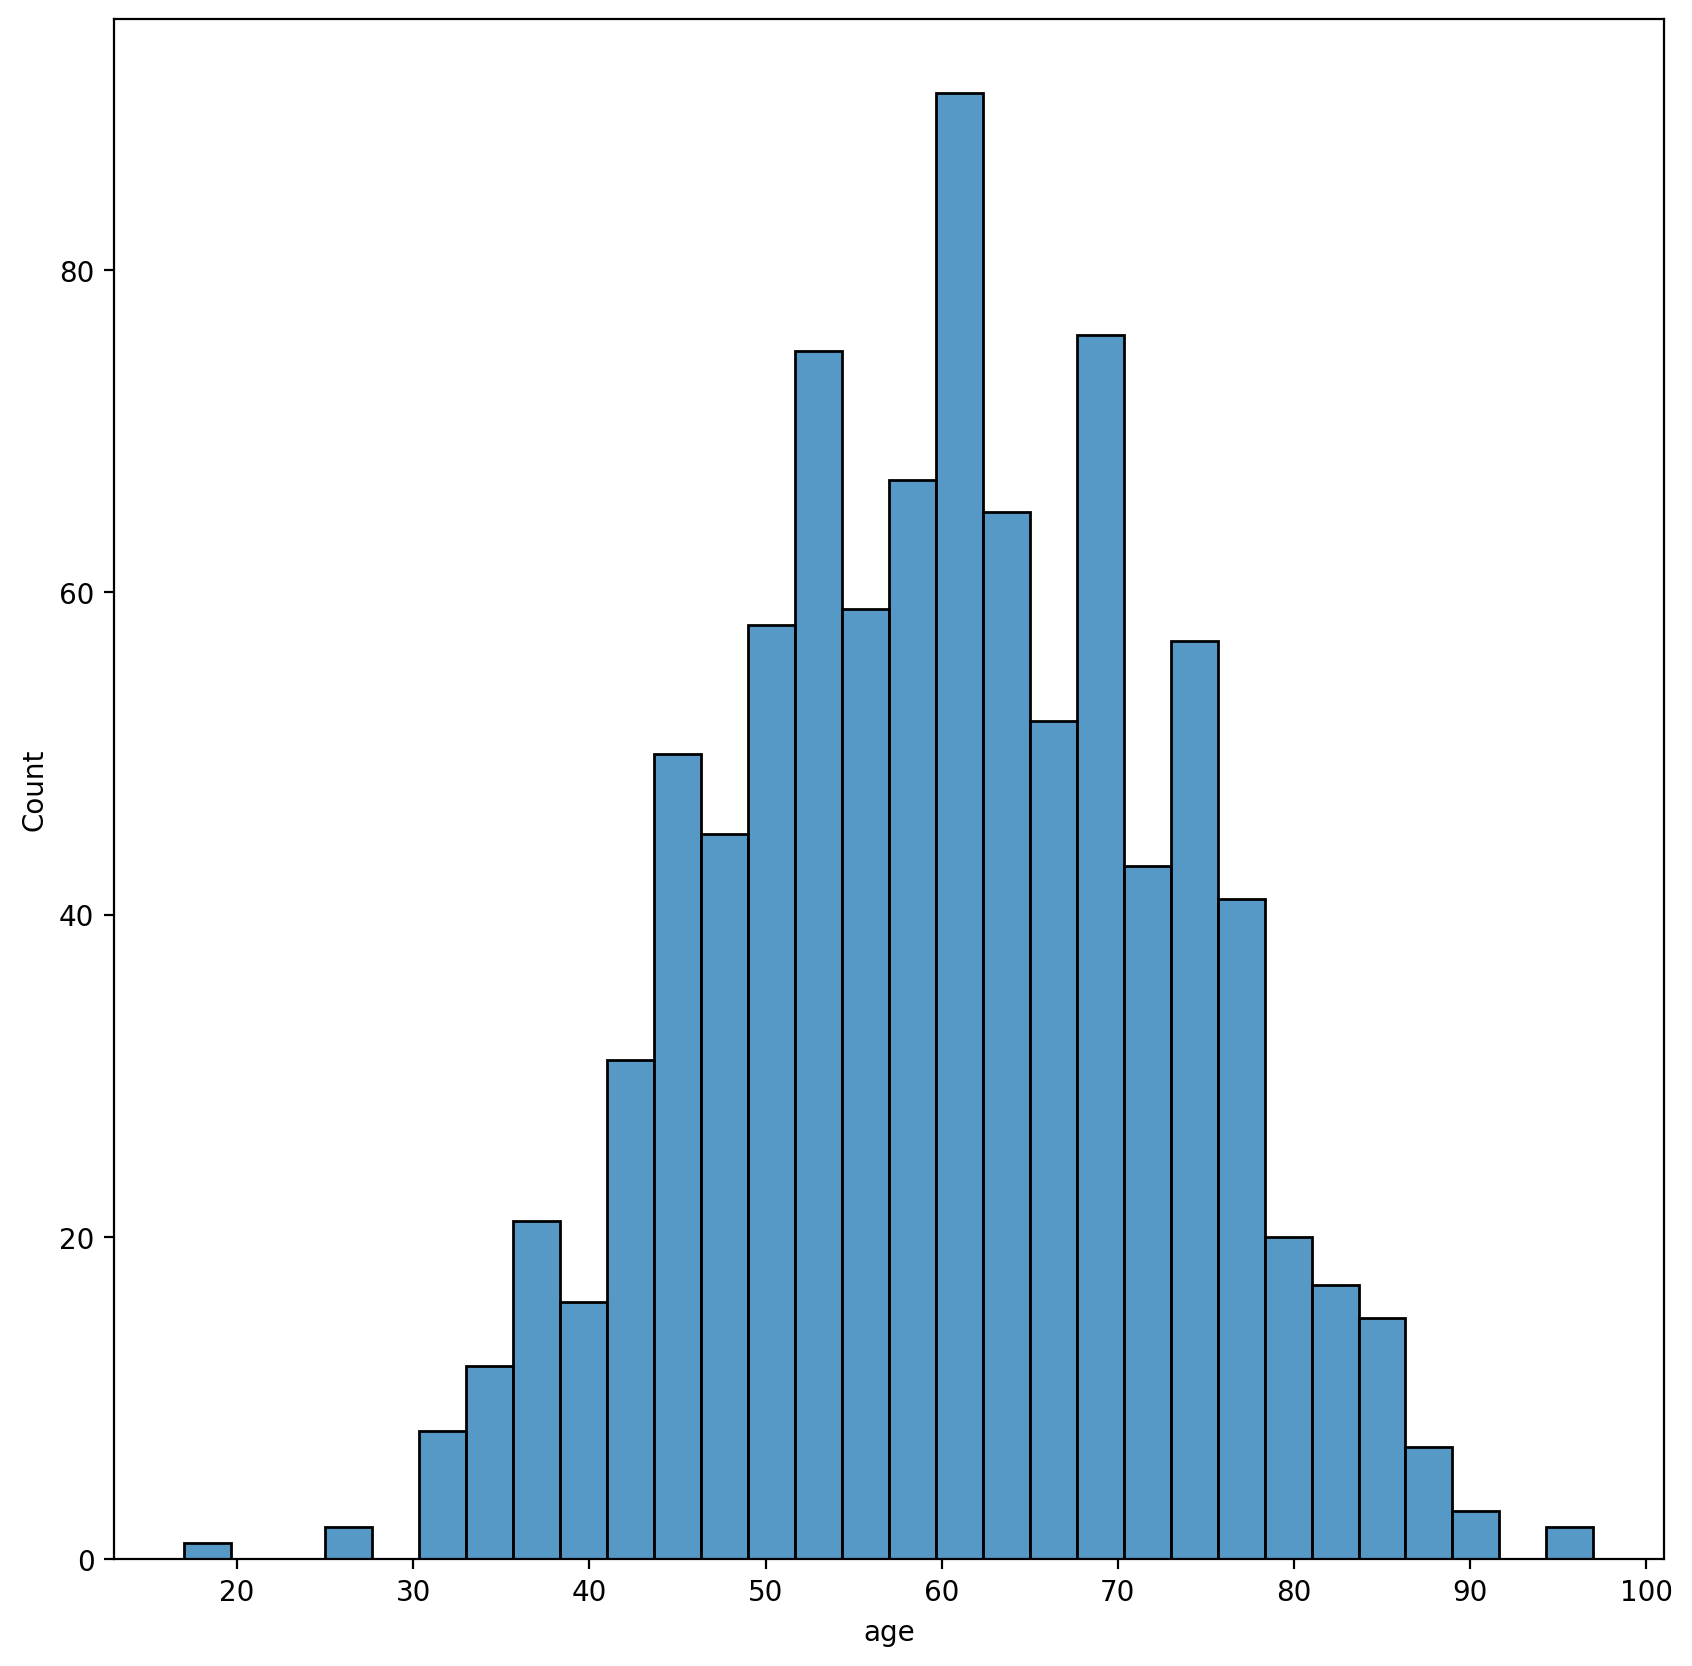

In [163]:
plt.figure(figsize=(10,10), dpi=200)
hist = sns.histplot(df_data, x='age', bins=30)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


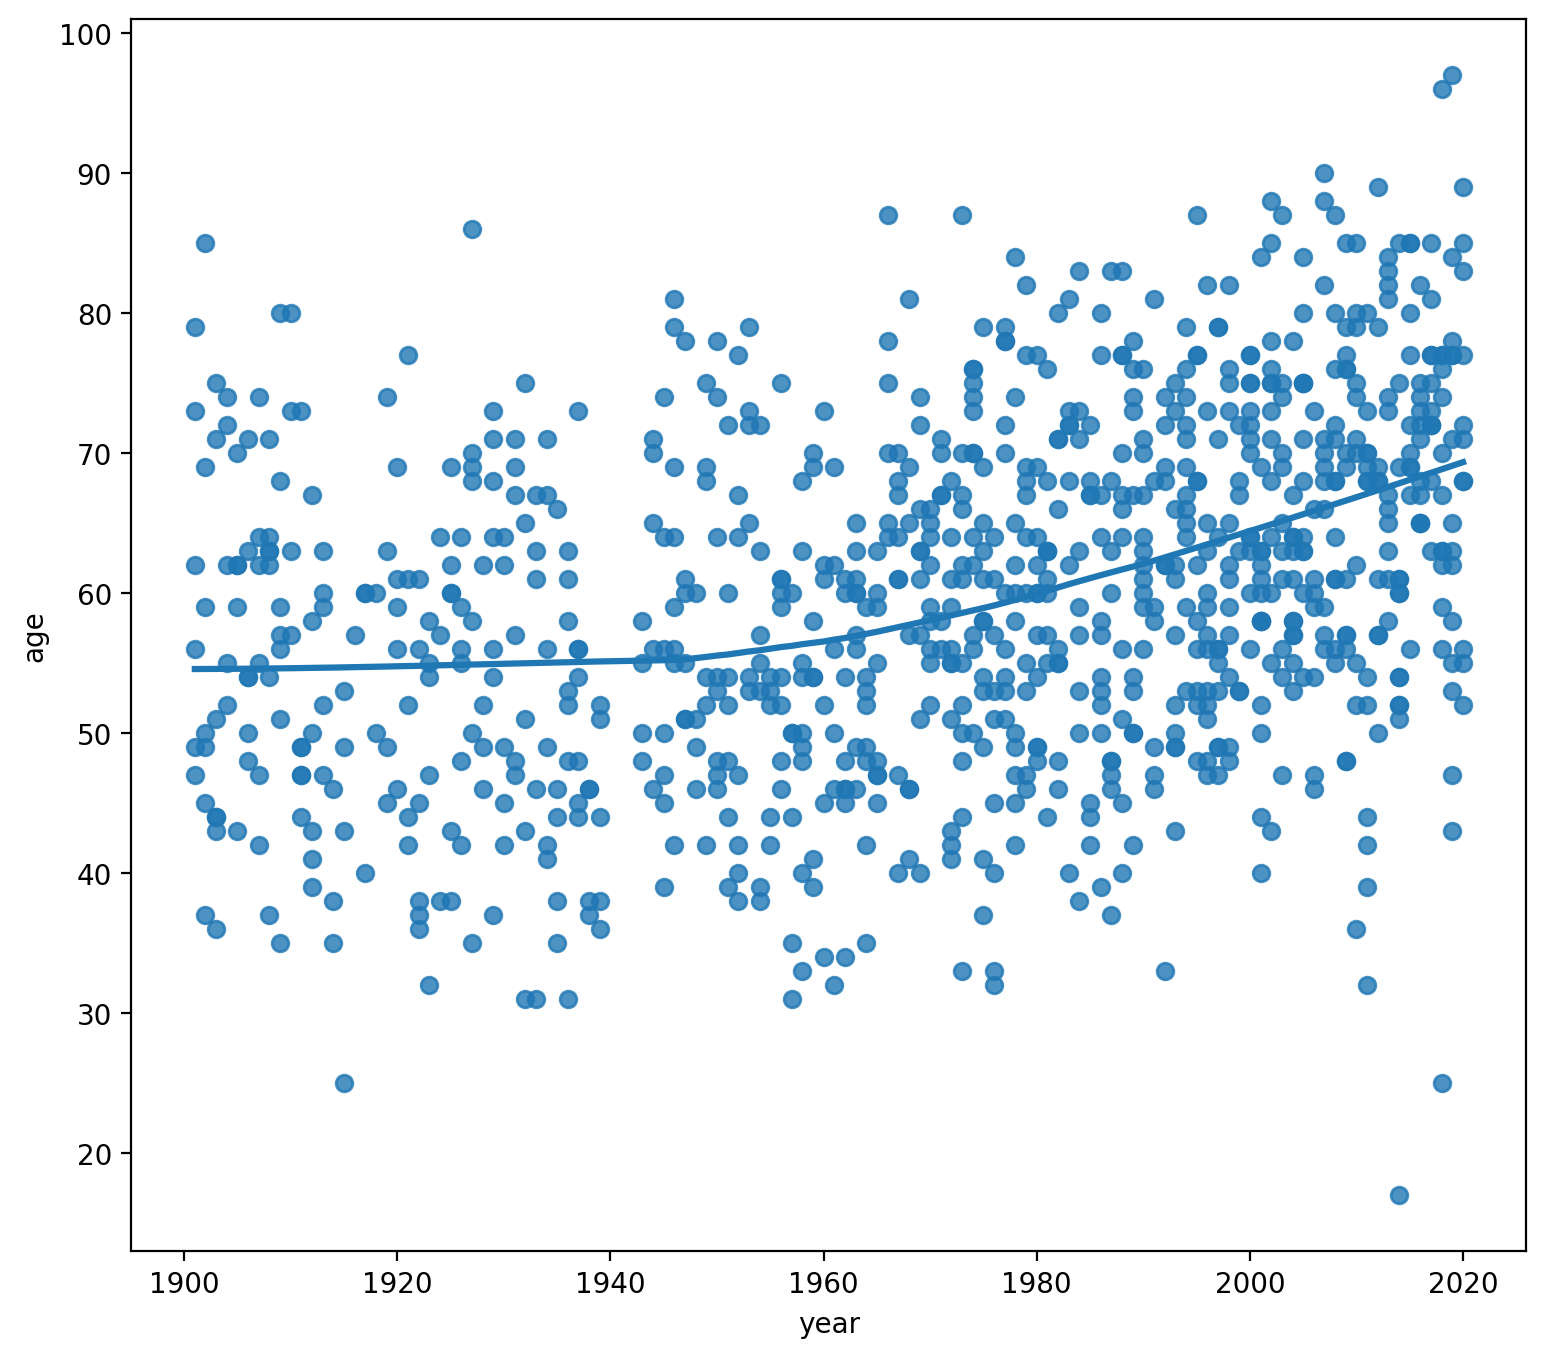

In [213]:
plt.figure(figsize=(9,8), dpi=200)
reg_plt = sns.regplot(df_data, x='year', y='age', lowess=True)
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [167]:
age_cat = df_data[['age', 'category']]
age_cat

age   category
937 97.00  Chemistry
933 96.00    Physics
794 90.00  Economics
961 89.00    Physics
856 89.00  Economics
..    ...        ...
860   NaN      Peace
873   NaN      Peace
897   NaN      Peace
919   NaN      Peace
958   NaN      Peace

[962 rows x 2 columns]

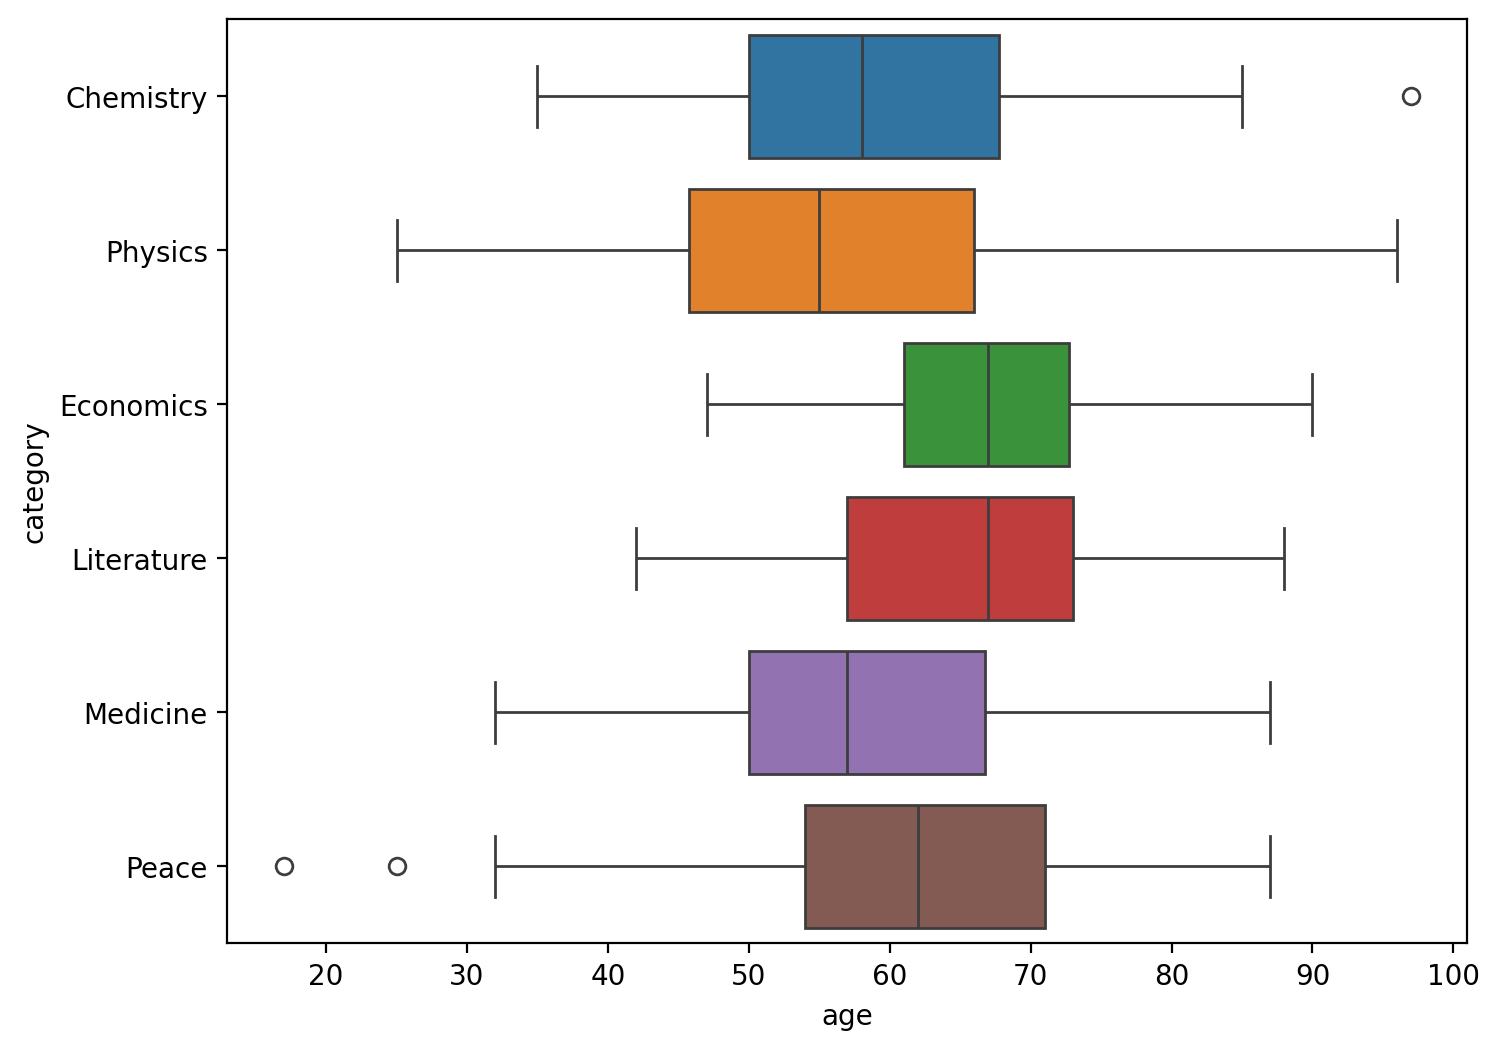

In [211]:
plt.figure(figsize=(8, 6), dpi=200)
box = sns.boxplot(data=df_data, x='age', y='category', hue='category')
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [179]:
la_plot_df = pd.merge(age_cat, age_year, on='age')

<Figure size 2000x2000 with 0 Axes>

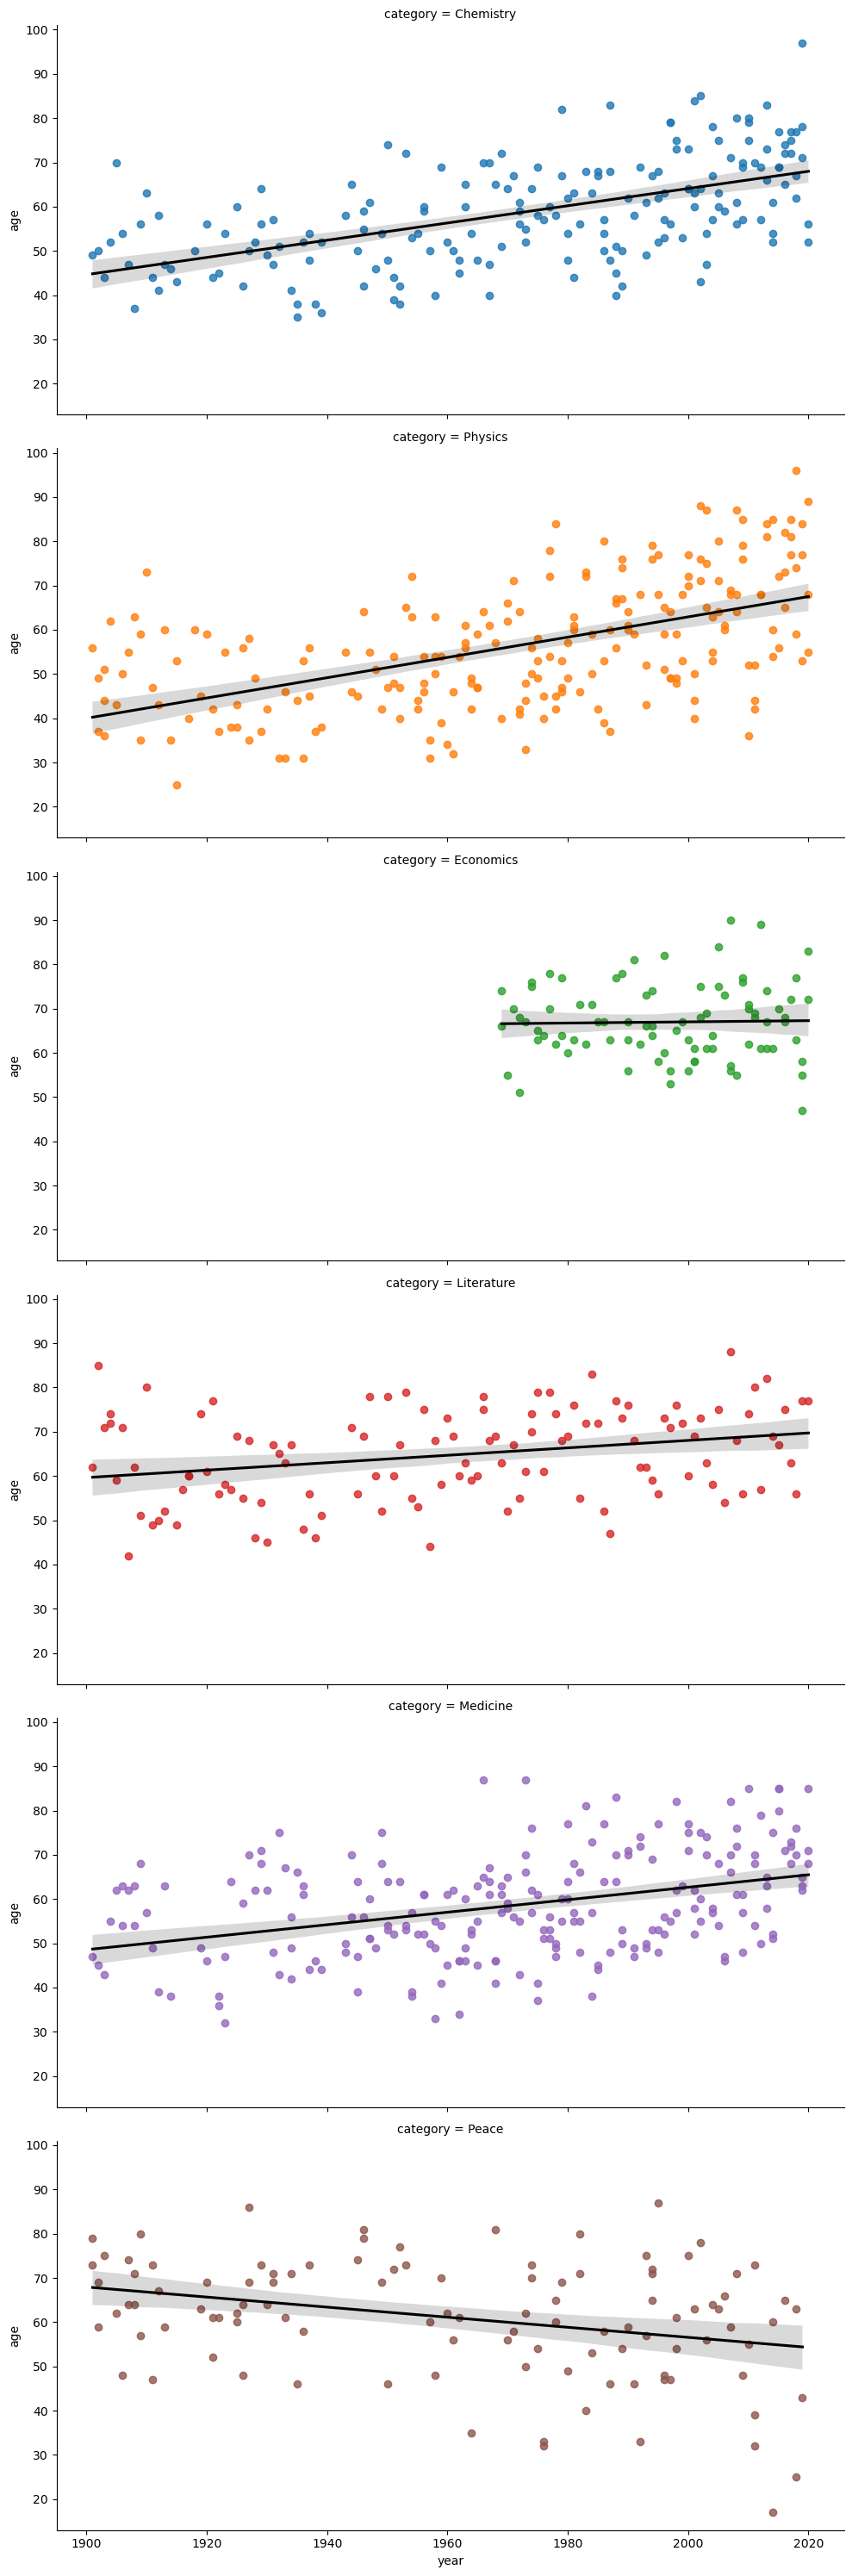

In [209]:
plt.figure(figsize=(10,10), dpi=200)
lm_plt = sns.lmplot(df_data, x='year', y='age', row='category', hue='category', aspect=2, line_kws={'color': 'black'})
plt.show()

<Figure size 2000x1600 with 0 Axes>

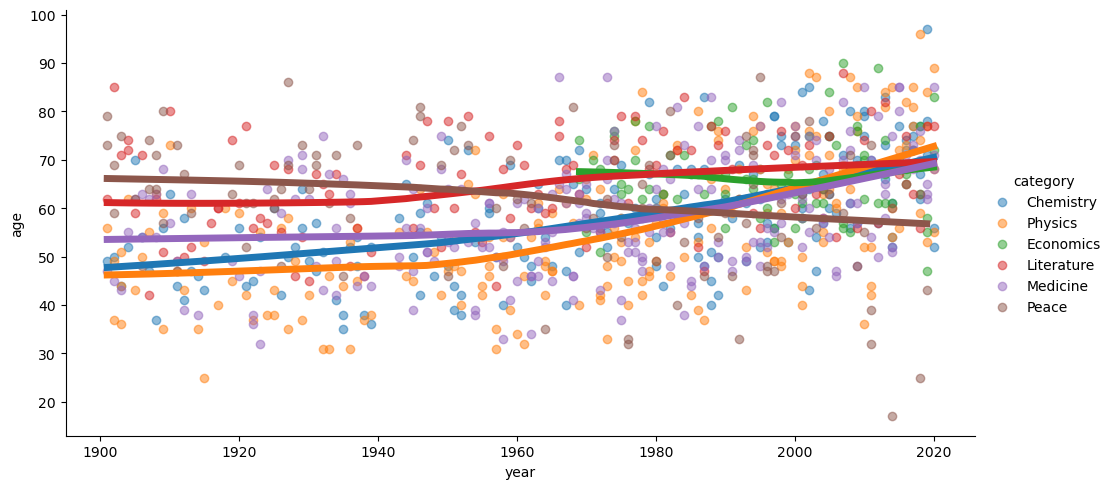

In [207]:
plt.figure(figsize=(10,8), dpi=200)
lm_plt = sns.lmplot(df_data, x='year', y='age', hue='category', aspect=2, line_kws={'linewidth': 5}, lowess=True,  scatter_kws={'alpha': 0.5})
plt.show()